# Sellable
## Find Best Fit Model for the Valuation Prediction

<div class="alert alert-block alert-info">
<b>Import all required libraries and folders</b> 
</div>

In [1]:
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

import math
# P A N D A S and N U M P Y
import numpy as np
import pandas as pd

#from myfunctions import myfunc
import myfunctions as myfunc

C:\Users\sergi\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\sergi\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


<div class="alert alert-block alert-info">
<b>Using Pandas DataFrames</b>&nbsp;&nbsp;&nbsp;Use the .read_csv() function to read the new_sample_file.csv file
</div>

In [2]:
df = pd.read_csv('../Datasets/OUTPUT/Combined_Output_fileComplete NSW Blacktown areas.csv')

<div class="alert alert-block alert-info">
<b>Clean DataFrame</b>
</div>

In [3]:
df[['Valuation']] = df[['Valuation']].replace('[!a-zA-Z+&,.\$£/:)(]', '', regex=True)
df[['Valuation']] = df[['Valuation']].replace(' ', np.nan, regex=True)

#df['Valuation'] = pd.to_numeric(df['Valuation'], errors='coerce').fillna(0).astype(np.int64)
include = ['suburb', 'Beds', 'Baths', 'Car', 'Lot', 'Valuation']
cat_list = ['suburb']
df = df[include].dropna()
df.Valuation = df.Valuation.astype(int)
array = df.values

<div class="alert alert-block alert-info">
<b>Create DUMMYS from Categorical List</b> 
</div>

In [4]:
#CREATE REFERENCE COPY
df_copy = df.copy(deep=True)

# Create DUMMYS from Categorical List
to_drop = [n + '_' + str(df_copy[n].unique()[-1]) for n in cat_list]       # Get to_drop col names by using Categorical List

df_copy = pd.get_dummies(df_copy, columns = cat_list, drop_first = False)  # Create dummy cols into the DataFrame

for a in to_drop:                                                          # Double Check to_drop Columns
    if(a not in df_copy.columns.values):
        print (n)

df_copy.drop(columns = to_drop, inplace = True)                            # Drop last dummy column

<div class="alert alert-block alert-info">
<b>Find Outliers and Remove them</b>
</div>

In [5]:
df_copy.head()

,Beds,Baths,Car,Lot,Valuation,suburb_Blacktown,suburb_Harris Park,suburb_Kings Langley,suburb_Lalor Park,suburb_Marayong,suburb_North Parramatta,suburb_North Rocks,suburb_Northmead,suburb_Old Toongabbie,suburb_Parramatta,suburb_Prospect,suburb_Seven Hills,suburb_Toongabbie
4,3,1,1,449,670000,0,0,0,0,0,0,0,0,0,0,0,1,0
5,3,1,3,552,572333,0,0,0,0,1,0,0,0,0,0,0,0,0
7,5,2,4,625,808333,1,0,0,0,0,0,0,0,0,0,0,0,0
9,4,3,2,764,1055333,0,0,0,0,0,0,1,0,0,0,0,0,0
11,2,1,1,0,545000,0,0,0,0,0,0,0,0,0,1,0,0,0


In [6]:
def get_outliners(dataset, outliers_fraction = 0.25):
    clf = svm.OneClassSVM(nu = 0.95 * outliers_fraction + 0.05, kernel = "rbf", gamma = 0.1)
    clf.fit(dataset)
    result = clf.predict(dataset)
    return result

training_dataset = df_copy[get_outliners(df_copy, 0.15)==1]

In [7]:
print ('Original DataFrame Shape:\t', df_copy.shape)
print ('New DataFrame Shape:     \t', training_dataset.shape)

Original DataFrame Shape:	 (671, 18)
New DataFrame Shape:     	 (272, 18)


In [8]:
training_dataset.head()

,Beds,Baths,Car,Lot,Valuation,suburb_Blacktown,suburb_Harris Park,suburb_Kings Langley,suburb_Lalor Park,suburb_Marayong,suburb_North Parramatta,suburb_North Rocks,suburb_Northmead,suburb_Old Toongabbie,suburb_Parramatta,suburb_Prospect,suburb_Seven Hills,suburb_Toongabbie
11,2,1,1,0,545000,0,0,0,0,0,0,0,0,0,1,0,0,0
15,2,1,1,0,520833,0,0,0,0,0,1,0,0,0,0,0,0,0
38,4,2,1,702,944167,0,0,1,0,0,0,0,0,0,0,0,0,0
43,4,2,6,724,856667,0,0,1,0,0,0,0,0,0,0,0,0,0
44,3,1,1,1011,733667,0,0,0,0,0,0,0,0,0,0,0,0,1


<div class="alert alert-block alert-info">
<b>Prepare Train, Test and Split Dataset</b>
</div>

In [9]:
#df_copy.drop('Valuation',inplace=True,axis=1)

In [10]:
column_list=df_copy.columns.tolist()

In [11]:
column_list.remove('Valuation')

In [12]:
column_list

['Beds',
 'Baths',
 'Car',
 'Lot',
 'suburb_Blacktown',
 'suburb_Harris Park',
 'suburb_Kings Langley',
 'suburb_Lalor Park',
 'suburb_Marayong',
 'suburb_North Parramatta',
 'suburb_North Rocks',
 'suburb_Northmead',
 'suburb_Old Toongabbie',
 'suburb_Parramatta',
 'suburb_Prospect',
 'suburb_Seven Hills',
 'suburb_Toongabbie']

In [13]:
training_dataset.head()

,Beds,Baths,Car,Lot,Valuation,suburb_Blacktown,suburb_Harris Park,suburb_Kings Langley,suburb_Lalor Park,suburb_Marayong,suburb_North Parramatta,suburb_North Rocks,suburb_Northmead,suburb_Old Toongabbie,suburb_Parramatta,suburb_Prospect,suburb_Seven Hills,suburb_Toongabbie
11,2,1,1,0,545000,0,0,0,0,0,0,0,0,0,1,0,0,0
15,2,1,1,0,520833,0,0,0,0,0,1,0,0,0,0,0,0,0
38,4,2,1,702,944167,0,0,1,0,0,0,0,0,0,0,0,0,0
43,4,2,6,724,856667,0,0,1,0,0,0,0,0,0,0,0,0,0
44,3,1,1,1011,733667,0,0,0,0,0,0,0,0,0,0,0,0,1


In [14]:
Xtrn, Xtest, Ytrn, Ytest = train_test_split(training_dataset[column_list], training_dataset[['Valuation']], test_size=0.3)

<div class="alert alert-block alert-info">
<b>STANDARDIZE Features</b> 
</div>

In [15]:
inc_list = ['Beds','Baths', 'Car','Lot']
# STANDARDIZE Features
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
Xtrn[column_list] = scale.fit_transform(Xtrn[column_list])
Xtest[column_list]  = scale.transform(Xtest[column_list])

print ('Train:\t', Xtrn.isnull().sum().sum(), 'nulls\nTest:\t', Xtest.isnull().sum().sum(), 'nulls')
print ('Train:', Xtrn.shape, '  Test:', Xtest.shape)

Train:	 0 nulls
Test:	 0 nulls
Train: (190, 17)   Test: (82, 17)


In [16]:
#LASSO METHOD
from sklearn.linear_model import Lasso, LassoCV
def use_lasso(X, y, cols, folds = 5):
    #Find Optimal Alpha
    optimal = LassoCV(cv = folds, verbose = 1)
    optimal.fit(X, y)
    print ('LASSO\nOptimal Alpha:', optimal.alpha_)

    #Use Optimal Alpha
    model = Lasso(alpha = optimal.alpha_)
    scores = cross_val_score(model, X, y, cv = folds)
    score_avg = scores.mean()
    print ('Score: {:.3f} ({:.3f})\n'.format(score_avg, scores.std()))

    #Get Top 10 Features
    model.fit(X, y)
    top = [[a, b] for a, b in zip(cols, model.coef_)]
    print (pd.DataFrame(top, columns = ['Feature', 'Coefficient']).sort_values(by = 'Coefficient', ascending = False)[:10])
    return model, score_avg
use_lasso(Xtrn,Ytrn,column_list, folds = 5)

LASSO
Optimal Alpha: 7785.150238208723
Score: 0.446 (0.261)

                    Feature   Coefficient
10       suburb_North Rocks  83914.020672
1                     Baths  40864.828672
11         suburb_Northmead  38146.151698
3                       Lot  36381.202280
0                      Beds  25809.638533
9   suburb_North Parramatta  14683.347491
6      suburb_Kings Langley  14202.902597
12    suburb_Old Toongabbie   6896.378493
2                       Car    142.647546
15       suburb_Seven Hills      0.000000


C:\Users\sergi\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


(Lasso(alpha=7785.150238208723, copy_X=True, fit_intercept=True, max_iter=1000,
    normalize=False, positive=False, precompute=False, random_state=None,
    selection='cyclic', tol=0.0001, warm_start=False), 0.44612667691842073)

In [17]:
#RIDGE METHOD
from sklearn.linear_model import Ridge, RidgeCV
def use_ridge(X, y, cols, folds = 5):
    #Find Optimal Alpha
    optimal = RidgeCV(alphas = np.logspace(-2, 7), cv = folds)
    optimal.fit(X, y)
    print ('RIDGE\nOptimal Alpha:', optimal.alpha_)

    #Use Optimal Alpha
    model = Ridge(alpha = optimal.alpha_)
    scores = cross_val_score(model, X, y, cv = folds)
    score_avg = scores.mean()
    print ('Score: {:.3f} ({:.3f})\n'.format(score_avg, scores.std()))

    #Get Top 10 Features
    model.fit(X, y)
    top = [[a, b] for a, b in zip(cols, model.coef_)]
    print (pd.DataFrame(top, columns = ['Feature', 'Coefficient']).sort_values(by = 'Coefficient', ascending = False)[:10])
    return model, score_avg

use_ridge(Xtrn,Ytrn,column_list, folds = 5)

RIDGE
Optimal Alpha: 47.14866363457394
Score: 0.437 (0.246)

  Feature                                        Coefficient
0    Beds  [27567.398801147363, 37184.73799761218, 9626.4...


(Ridge(alpha=47.14866363457394, copy_X=True, fit_intercept=True, max_iter=None,
    normalize=False, random_state=None, solver='auto', tol=0.001),
 0.4365935602263205)

<div class="alert alert-block alert-info">
<b>Test Models</b>
<br>&nbsp;&nbsp;&nbsp;1.&nbsp;&nbsp;&nbsp;Linear Regression
<br>&nbsp;&nbsp;&nbsp;2.&nbsp;&nbsp;&nbsp;Random Forest Regression
<br>&nbsp;&nbsp;&nbsp;3.&nbsp;&nbsp;&nbsp;KNN Regression (K nearest neighbor algorithm)
<br>&nbsp;&nbsp;&nbsp;4.&nbsp;&nbsp;&nbsp;SVR (Support Vector Regression)
<br>&nbsp;&nbsp;&nbsp;5.&nbsp;&nbsp;&nbsp;Logistic Regression
<br>&nbsp;&nbsp;&nbsp;6.&nbsp;&nbsp;&nbsp;Plot Models
</div>

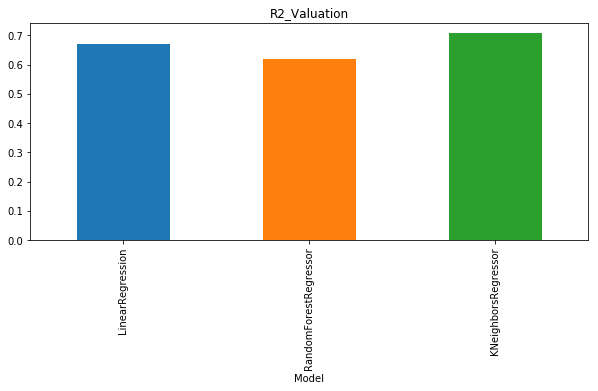

,R2_Valuation
Model,
LinearRegression,0.670919
RandomForestRegressor,0.619121
KNeighborsRegressor,0.708490


In [18]:
models = [LinearRegression(),
          RandomForestRegressor(n_estimators = 100, max_features = 'sqrt'),
          KNeighborsRegressor(n_neighbors=6),
#          SVR(kernel = 'linear'),
#          LogisticRegression()
         ]

TestModels = pd.DataFrame()
tmp = {}

for model in models:
    # get model name
    m = str(model)
    tmp['Model'] = m[:m.index('(')]
    
    # fit model on training dataset
    model.fit(Xtrn, Ytrn['Valuation'])
    
    # predict prices for test dataset and calculate r^2
    tmp['R2_Valuation'] = r2_score(Ytest['Valuation'], model.predict(Xtest))

    # write obtained data
    TestModels = TestModels.append([tmp])

TestModels.set_index('Model', inplace=True)

fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.R2_Valuation.plot(ax=axes, kind='bar', title='R2_Valuation')
plt.show()
TestModels

In [19]:
# Splitting Original Data into Validation and Training Set
def split_vals(a, n): return a[:n].copy(), a[n:].copy()

X = training_dataset[column_list]
y = training_dataset['Valuation']

n_valid = 119  # Validation Set Size
n_trn = len(training_dataset)-n_valid
X_train, X_valid = split_vals(X, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((153, 17), (153,), (119, 17))

In [20]:
# Printing accuracy and RMSE
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

# PREDICTOR = RandomForestRegressor(n_estimators=100, n_jobs=-1, oob_score=True,  max_features = 0.5,
#                               min_samples_leaf = 2).fit(X, y)
PREDICTOR = RandomForestRegressor(n_estimators = 6000, max_features = 'sqrt').fit(X, y)
print_score(PREDICTOR)
# cv_score_PREDICTOR = cross_validation.cross_val_score(PREDICTOR, df_train, y, cv=5); cv_score_PREDICTOR

[70618.5650049775, 66672.3675374488, 0.8295523971857126, 0.9004796885291625]


C:\Users\sergi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sergi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sergi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sergi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

LR: 0.052632 (0.033287)
LDA: 0.000000 (0.000000)
KNN: 0.036842 (0.047368)
CART: 0.078947 (0.035306)


C:\Users\sergi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sergi\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\sergi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sergi\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\sergi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array 

C:\Users\sergi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sergi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sergi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sergi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

NB: 0.063158 (0.031579)


C:\Users\sergi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sergi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sergi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sergi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

SVM: 0.042105 (0.021053)


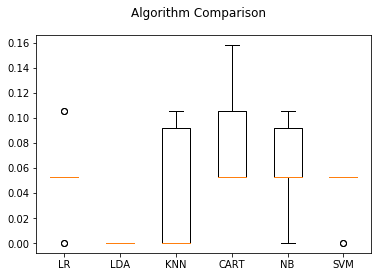

In [21]:
# prepare configuration for cross validation test harness
seed = 7

# prepare models
models = []
models.append(('LR',   LogisticRegression()))
models.append(('LDA',  LinearDiscriminantAnalysis()))
models.append(('KNN',  KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB',   GaussianNB()))
models.append(('SVM',  SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, Xtrn, Ytrn, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [22]:
## Using SGD Regressor
sgd   = SGDRegressor()
model = sgd.fit(training_dataset[column_list], training_dataset[['Valuation']])
score = model.score(training_dataset[column_list], training_dataset[['Valuation']])

# Cross Validation
sgdcv = cross_val_score(sgd,training_dataset[column_list], training_dataset[['Valuation']],cv=10)
print(sgdcv)
print (model, '\n', score)

[-3.16555431e+19 -6.41560073e+18 -8.76722708e+18 -2.13530515e+19
 -2.22529143e+17 -1.04084786e+15 -2.06558080e+19 -8.92135418e+15
 -8.46619515e+18 -5.76306796e+17]
SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False) 
 -2580396565953306.0


C:\Users\sergi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\sergi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sergi\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, t

# Model we will be using will be Random Forest Regression